In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('data/ex1data1.txt', names=['Pop', 
                                              'Pro'])
data.head()
data.describe()

,Pop,Pro
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


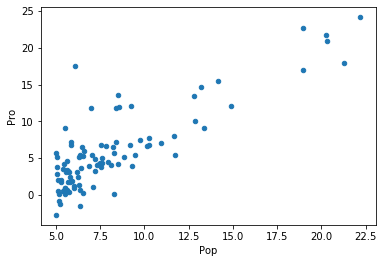

In [4]:
data.plot(kind='scatter', x='Pop', y='Pro')

In [12]:
def comCost(X,y,theta):
    y_pred = np.power((X*theta.T - y), 2)
    return np.sum(y_pred) / (2*len(X))

In [6]:
data.insert(0, "Int", 1)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

In [7]:
X = np.matrix(X.values)

In [9]:
y = np.matrix(y.values)



AttributeError: 'matrix' object has no attribute 'values'

In [10]:
theta = np.matrix(np.array([0,0]))

In [11]:
cost(X,y,theta)

32.072733877455676

In [15]:
def gradientDes(X,y,theta,alpha,iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X*theta.T) - y
        for j in range(parameters):
            term = np.multiply(error, X[:, j])
            temp[0,j] = theta[0,j] - ((alpha/len(X)) * np.sum(term))
        theta = temp
        cost[i] = comCost(X,y,theta)
    return theta,cost

Text(0.5, 1.0, 'Prediction vs Data')

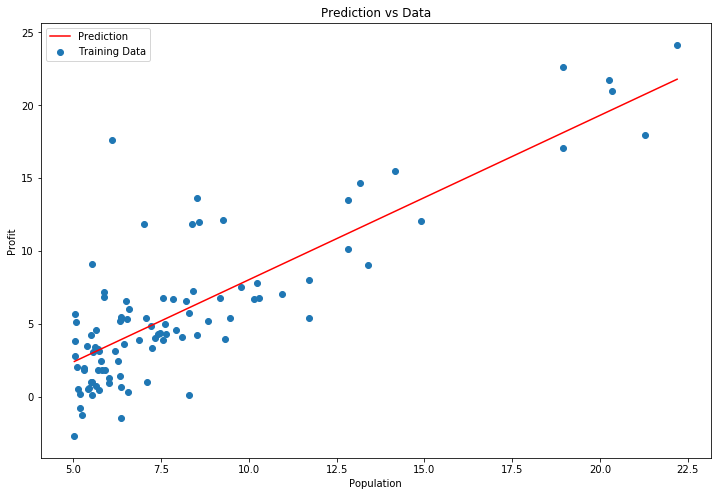

In [25]:
alpha = 0.01
iters = 1000

sol, cost = gradientDes(X,y,theta, alpha,iters)
sol

x = np.linspace(data.Pop.min(), data.Pop.max(), 1000)
f = sol[0,0] + (sol[0,1]*x)
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x,f, 'r', label='Prediction')
ax.scatter(data.Pop, data.Pro, label='Training Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Prediction vs Data')

Text(0.5, 1.0, 'Error vs. Training Epoch')

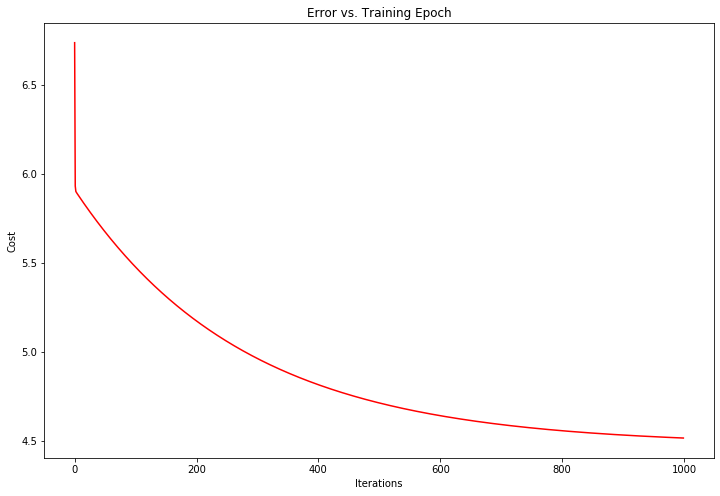

In [26]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')